<a href="https://colab.research.google.com/github/pavopija/classifier/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow opencv-python matplotlib

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

<ipython-input-5-45c64f998d76>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    print(image_class)

small
.ipynb_checkpoints
big


In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
          img = cv2.imread(image_path)
          tip = imghdr.what(image_path)
          if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/small/Push-up-bikini-top-1-683x1024.webp
Image not in ext list data/big/eva-marie-bikini.gif
Image not in ext list data/big/Sexy-Bikini-Gathered-Big-Breasts-Gradient-Color-Backless-Swi (1).webp
Image not in ext list data/big/image.webp
Image not in ext list data/big/0_PAY-PREMIUM-EXCLUSIVE-MUST-CALL-FOR-PRICING-WEB-EMBARGO-UN.jpg
Image not in ext list data/big/0_PAY-PREMIUM-EXCLUSIVE-MUST-CALL-FOR-PRICING-BEFORE-USAGE-S.jpg
Image not in ext list data/big/68097419-11795191-image-a-125_1677421623242.jpg
Image not in ext list data/big/68353373-11822685-image-a-12_1678015141628.jpg
Image not in ext list data/big/Sexy-Bikini-Gathered-Big-Breasts-Gradient-Color-Backless-Swi.webp
Image not in ext list data/big/PAY-Courtney-Stodden.jpg
Image not in ext list data/big/the-everygirl-best-bathing-suits-for-big-boobs-feature.jpg


In [17]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import os

# Remove .ipynb_checkpoints if it exists
checkpoints_path = os.path.join(data_dir, '.ipynb_checkpoints')
if os.path.exists(checkpoints_path):
    os.rmdir(checkpoints_path)  # Only works if it's empty
    # If not empty, use shutil.rmtree(checkpoints_path)

# Now safe to proceed
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

for images, labels in dataloader:
    print(images.shape)  # torch.Size([32, 3, 128, 128])
    print(labels)        # tensor([0, 1, 1, 0, ...])
    break  # remove this to go through whole dataset


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


torch.Size([32, 3, 128, 128])
tensor([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 1])


In [10]:
img = cv2.imread('data/big/261260029.jpg')

In [11]:
img.shape

(1120, 1500, 3)

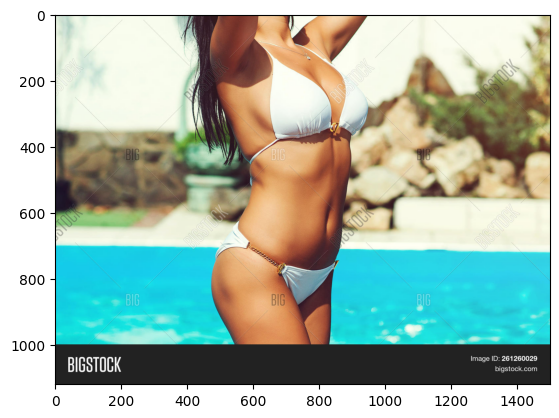

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
import numpy as np


In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 186 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

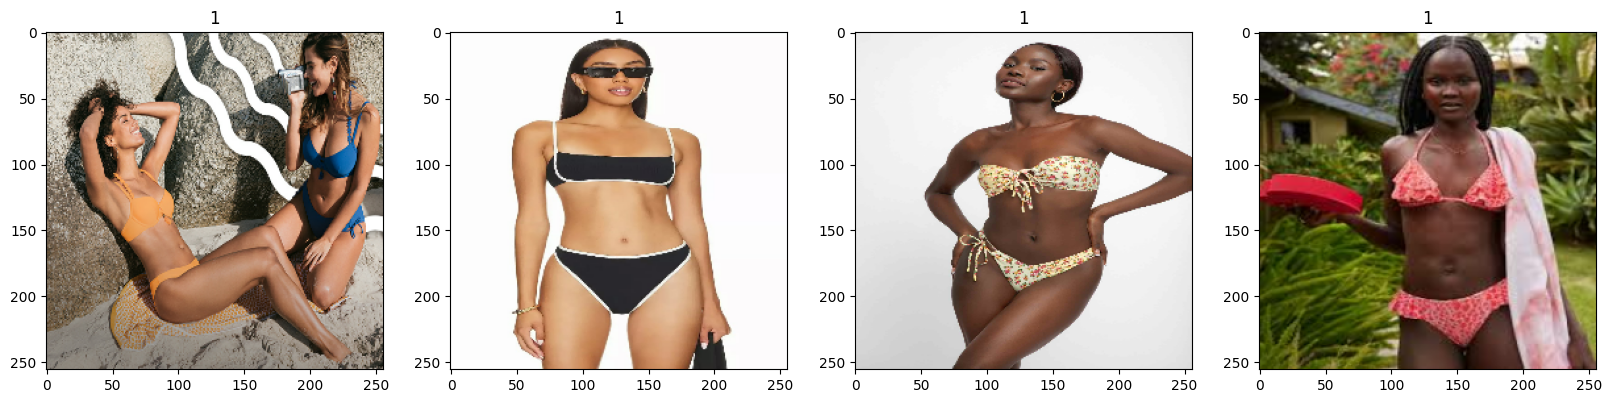

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

2. Preprocess Data


In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

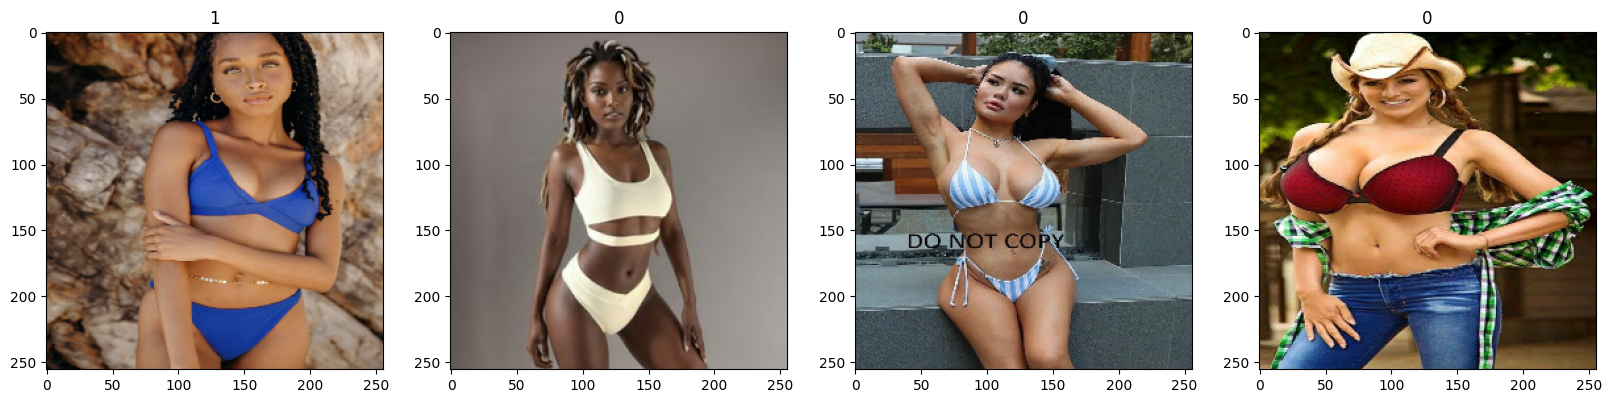

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [21]:
data.as_numpy_iterator().next()[0].max()

np.float32(1.0)

In [22]:
len(data)

6

In [23]:
train_size = 4
val_size = 1
test_size = 1

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

3. Deep Learning Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
logdir = 'logs'

In [31]:
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensor_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5250 - loss: 0.7443 - val_accuracy: 0.4688 - val_loss: 0.6923
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.5365 - loss: 0.7021 - val_accuracy: 0.6562 - val_loss: 0.6668
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6865 - loss: 0.6778 - val_accuracy: 0.8438 - val_loss: 0.6527
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7812 - loss: 0.6427 - val_accuracy: 0.5000 - val_loss: 0.6374
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5802 - loss: 0.6464 - val_accuracy: 0.5000 - val_loss: 0.6594
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6208 - loss: 0.5628 - val_accuracy: 0.9062 - val_loss: 0.5458
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.7937 - loss: 0.5829 - val_accuracy: 0.9062 - val_loss: 0.4690
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8562 - loss: 0.4966 - val_accuracy: 0.7188 - val_loss: 0.4963
Epoch 9/

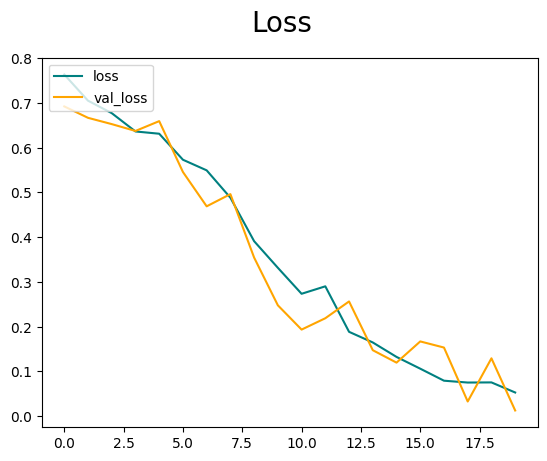

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()
#

4. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


In [37]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


4.2 Test


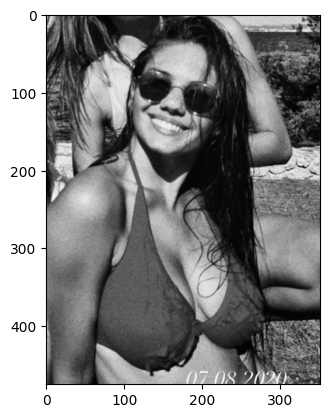

In [38]:
img = cv2.imread('bigtest.jpg')
plt.imshow(img)
plt.show()

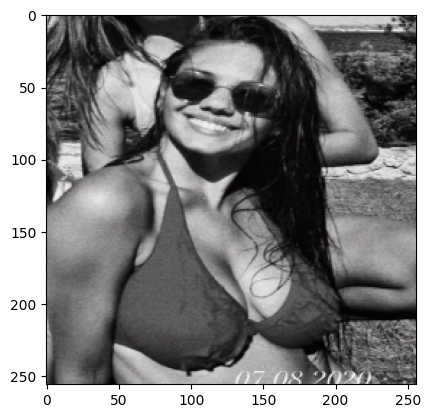

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
resize.shape

TensorShape([256, 256, 3])

In [41]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [43]:
yhat

array([[0.1417808]], dtype=float32)

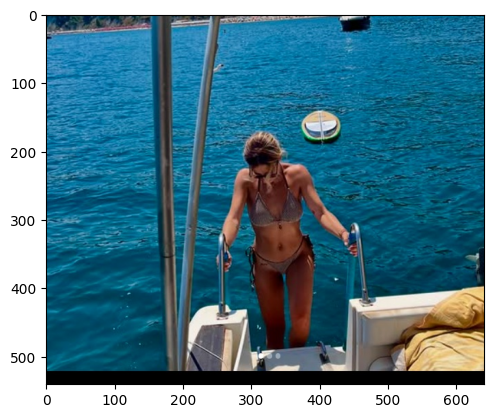

(1, 256, 256, 3)

In [47]:
img2 = cv2.imread('smalltest.jpg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

resize2 = tf.image.resize(img2, (256,256))

np.expand_dims(resize2, 0).shape



In [50]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [51]:
yhat2

array([[0.81770575]], dtype=float32)

In [52]:
!pip freeze > requirements.txt
